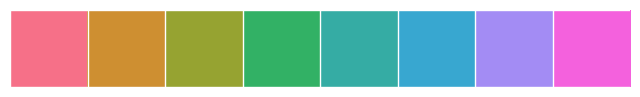

In [484]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))
import matplotlib.dates as mdates

In [514]:
path='/Users/stella/Desktop/'
date_0=datetime.date(2017,4,14)
date_1=datetime.date(2017,7,1)

In [515]:
#april         3783
apr_3783=pd.read_excel(path+'queens-data/Queens Data Logger TSI 3783 Ultrafine February to April.xls')[1:-8]
apr_3783['Date&Time']=apr_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

#may-june      3783
may_jun_3783=pd.read_csv(path+'queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_3783 = may_jun_3783.rename(columns=may_jun_3783.iloc[1])
may_jun_3783 = may_jun_3783[3:]
may_jun_3783=may_jun_3783[['Date&Time','UF Aggregated Conc.']]
may_jun_3783['Date&Time']=may_jun_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

tsi_3783=pd.concat([apr_3783,may_jun_3783])

tsi_3783['UF Aggregated Conc.']=pd.to_numeric(tsi_3783['UF Aggregated Conc.'], errors='coerce')
tsi_3783=tsi_3783[(tsi_3783['Date&Time']>date_0) & (tsi_3783['Date&Time']<date_1)]
tsi_3783=tsi_3783.reset_index()
del tsi_3783['index']

tsi_3783.columns=['time','PN (#/cm3)']

In [516]:
#april         3031
apr_3031=pd.read_csv(path+'queens-data/TSI 3031 Particle Counter_20170413-april.TXT',delimiter='\t',skiprows=4)
apr_3031=apr_3031.reset_index()
apr_3031.columns=apr_3031.iloc[0]
apr_3031=apr_3031.iloc[1:].reset_index()
apr_3031['start']=apr_3031['start'].apply(lambda x: parse(x))
apr_3031['end']=apr_3031['end'].apply(lambda x: parse(x))
apr_3031=apr_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

#may-june      3031
may_jun_3031=pd.read_csv(path+'queens-data/TSI 3031_20170501.TXT',delimiter='\t',skiprows=4)
may_jun_3031=may_jun_3031.reset_index()
may_jun_3031.columns=may_jun_3031.iloc[0]
may_jun_3031=may_jun_3031.iloc[1:].reset_index()
may_jun_3031['start']=may_jun_3031['start'].apply(lambda x: parse(x))
may_jun_3031['end']=may_jun_3031['end'].apply(lambda x: parse(x))
may_jun_3031=may_jun_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

tsi_3031=pd.concat([apr_3031,may_jun_3031])

tsi_3031=tsi_3031[(tsi_3031['start']>date_0) & (tsi_3031['start']<date_1)]
tsi_3031=tsi_3031.reset_index()
del tsi_3031['index']
tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']] = tsi_3031[['ch1','ch2','ch3','ch4','ch5','ch6']].apply(pd.to_numeric)

In [517]:
# TEOM APRIL and JUNE - MAY INVALIDATED
teom_apr=pd.read_csv(path+'queens-data/1405DF TEOM_A225741308_2017-04-28_16-07-18-mar-apr.csv')
teom_apr=teom_apr[['Date','Time','tmoTEOMAFEMMC_0']]
teom_apr['datetime']=teom_apr['Date']+' '+teom_apr['Time']
teom_apr['datetime']=teom_apr['datetime'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M:%S'))
teom_apr=teom_apr[['datetime','tmoTEOMAFEMMC_0']]
teom_apr=teom_apr.rename(columns={'tmoTEOMAFEMMC_0':'PM2.5 (ug/m3)'})
teom_apr=teom_apr[(teom_apr['datetime']>=datetime.date(2017,4,1)) & (teom_apr['datetime']<datetime.date(2017,5,1))]

teom_jun=pd.read_csv(path+'data-2/TEOM_TSI 3783_May-June_2017.csv')[1:-9]
teom_jun=teom_jun.rename(columns={'﻿Date&Time':'time'})
teom_jun=teom_jun[['time','PM2.5_FEM_MC']]
teom_jun['time']=teom_jun['time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))
teom_jun['PM2.5_FEM_MC']=pd.to_numeric(teom_jun['PM2.5_FEM_MC'], errors='coerce')
#teom2=teom2[teom2['PM2.5_FEM_MC']>0]
teom_jun=teom_jun.reset_index()
del teom_jun['index']
teom_jun=teom_jun[(teom_jun['time']>=datetime.date(2017,6,1)) & (teom_jun['time']<datetime.date(2017,7,1))]
teom_jun=teom_jun.rename(columns={'time':'datetime','PM2.5_FEM_MC':'PM2.5 (ug/m3)'})

teom=pd.concat([teom_apr,teom_jun])
num=teom._get_numeric_data()
num[num<=0]=np.nan

In [518]:
# PEGASOR INDOOR AND OUTDOOR DATA
i_ldsa=pd.read_excel(path+'data-2/realeco_sn0135-ldsa_2017-01-23t181000_2017-07-01t181000.xlsx')
i_ldsa=i_ldsa.set_index('time')
i_pn=pd.read_excel(path+'data-2/realeco_sn0135-pm25_2017-01-19t181600_2017-07-01t181600.xlsx')
i_pn=i_pn.set_index('time')
i_pm25=pd.read_excel(path+'data-2/realeco_sn0135-pn_2017-01-25t183900_2017-07-01t183900.xlsx')
i_pm25=i_pm25.set_index('time')

i_df=(i_ldsa.join(i_pn)).join(i_pm25).dropna()
i_df.columns=['i-ldsa','i-pm25','i-pn']

urban=pd.read_csv(path+'data-2/1329_PEGASOR A_20170712185105-2.csv',delimiter=',')
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))
urban.columns=['time','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2']
urban['pn-1'].loc[:80034]=urban['pn-1'].loc[:80034]*6
urban['pn-2'].loc[:80033]=urban['pn-2'].loc[:80033]*6
urban=urban.set_index('time')

pegasor=i_df.join(urban).reset_index()

pegasor=pegasor[(pegasor['time']>date_0) & (pegasor['time']<date_1)]
pegasor=pegasor[pegasor>0].dropna().reset_index()
pegasor=pegasor.reset_index()
del pegasor['index']
del pegasor['level_0']

/Users/stella/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [519]:
# compare urban 1, urban 2 differences
pegasor['ldsa-1/2']=pegasor['ldsa-1']/pegasor['ldsa-2']
pegasor['ldsa-2/1']=pegasor['ldsa-2']/pegasor['ldsa-1']

# remove pegasor urban units +5x each other
pegasor=pegasor[pegasor['ldsa-2/1']<5]
pegasor=pegasor[pegasor['ldsa-1/2']<5].reset_index()
del pegasor['index'], pegasor['ldsa-1/2'], pegasor['ldsa-2/1']

In [520]:
tsi3783_hr=tsi_3783.set_index('time').resample(rule='1H').mean().reset_index()
tsi3783_daily=tsi_3783.set_index('time').resample(rule='24H').mean().reset_index()

tsi3031_hr=tsi_3031.set_index('start').resample(rule='1H').mean().reset_index()
tsi3031_daily=tsi_3031.set_index('start').resample(rule='24H').mean().reset_index()

teom_hr=teom.set_index('datetime').resample(rule='1H').mean().reset_index()
teom_daily=teom.set_index('datetime').resample(rule='24H').mean().reset_index()

pegasor_hr=pegasor.set_index('time').resample(rule='1H').mean().reset_index()
pegasor_daily=pegasor.set_index('time').resample(rule='24H').mean().reset_index()

In [521]:
df_hr=pegasor_hr.set_index('time').join(tsi3783_hr.set_index('time')).join(tsi3031_hr.set_index('start')).join(teom_hr.set_index('datetime')).reset_index()
df_daily=pegasor_daily.set_index('time').join(tsi3783_daily.set_index('time')).join(tsi3031_daily.set_index('start')).join(teom_daily.set_index('datetime')).reset_index()

In [522]:
df_hr_apr=df_hr[df_hr.time<datetime.date(2017,5,1)]                                                       # APR
df_hr_may=df_hr[(df_hr.time>=datetime.date(2017,5,1)) & (df_hr.time<datetime.date(2017,6,1))]             # MAY
df_hr_jun=df_hr[df_hr.time>=datetime.date(2017,6,1)]                                                      # JUN

df_daily_apr=df_daily[df_daily.time<datetime.date(2017,5,1)]                                              # APR
df_daily_may=df_daily[(df_daily.time>=datetime.date(2017,5,1)) & (df_daily.time<datetime.date(2017,6,1))] # MAY
df_daily_jun=df_daily[df_daily.time>=datetime.date(2017,6,1)]                                             # JUN

In [523]:
path2='/Users/stella/Desktop/CHTechUSA Data_2017_1002/'

In [524]:
# TEOM & TSI 3783
df1=pd.read_csv(path2+'Data Logger Download.csv')
df1=df1[['Date&Time','PM2.5_FEM_MC','PM10_MC','UF Aggregated Conc.']][1:-8].reset_index()
del df1['index']
df1['Date&Time']=df1['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))
df1.columns=['time','PM2.5 (ug/m3)','PM10 (ug/m3)','TNC (#/cm3)']
df1['PM2.5 (ug/m3)']=pd.to_numeric(df1['PM2.5 (ug/m3)'], errors='coerce')
df1['PM10 (ug/m3)']=pd.to_numeric(df1['PM10 (ug/m3)'], errors='coerce')
df1['TNC (#/cm3)']=pd.to_numeric(df1['TNC (#/cm3)'], errors='coerce')

#df1=df1.replace(0,np.nan)
num=df1._get_numeric_data()
num[num<=0]=np.nan
#df1[(num[num<=0]).any(1)]                   # CHECK DELETING NEGATIVES
#df1=df1.dropna()

df1_hr=df1.set_index('time').resample(rule='1H').mean().reset_index()
df1_daily=df1.set_index('time').resample(rule='24H').mean().reset_index()

In [525]:
# SMPS TSI 3031
df2=pd.read_csv(path2+'TSI3031_20170701.TXT',delimiter='\t')
df2=df2[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]
df2['start']=df2['start'].apply(lambda x: parse(x))
df2['end']=df2['end'].apply(lambda x: parse(x))

num2=df2._get_numeric_data()
num2[num2<=0]=np.nan
#df2[(num[num<=0]).any(1)]                   # CHECK DELETING NEGATIVES
#df2=df2.dropna()
exclude=df2[(df2['start']>=datetime.date(2017,9,12)) & (df2['start']<datetime.date(2017,9,16))].index
exclude=df2.index.isin(exclude)
df2=df2[~exclude]

df2_hr=df2.set_index('start').resample(rule='1H').mean().reset_index()
df2_daily=df2.set_index('start').resample(rule='24H').mean().reset_index()

In [526]:
# TEOM, 3783, 3031 - HOURLY, DAILY
df_hr=df1_hr.set_index('time').join(df2_hr.set_index('start')).reset_index()
df_daily=df1_daily.set_index('time').join(df2_daily.set_index('start')).reset_index()

In [527]:
# PEGASOR INDOOR SN-135 FROM REALECO
ildsa=pd.read_excel(path2+'realeco_sn0135-ldsa_2017-06-30t144100_2017-07-14t144100.xlsx')
ipm=pd.read_excel(path2+'realeco_sn0135-pm25_2017-06-30t145200_2017-07-14t145200.xlsx')
ipn=pd.read_excel(path2+'realeco_sn0135-pn_2017-06-30t145300_2017-07-14t145300.xlsx')
idf=ildsa.set_index('time').join(ipm.set_index('time')).join(ipn.set_index('time')).dropna().reset_index()
idf['time']=idf['time']-datetime.timedelta(hours=1)          # TIME ADJUSTED -1 HOUR

idf=idf[(idf['time']>=datetime.date(2017,7,1)) & (idf['time']<=datetime.date(2017,7,14))].reset_index()
del idf['index']
idf=idf.replace(0,np.nan)

idf_hr=idf.set_index('time').resample(rule='1H').mean().reset_index()
idf_daily=idf.set_index('time').resample(rule='24H').mean().reset_index()

In [528]:
# PEGASOR URBAN FROM AIR MONITORS
urban=pd.read_csv('/Users/stella/Desktop/CHTechUSA Data_2017_1002/Pagesor A_29 June to 02 Oct 2017_UTC0.csv',delimiter=',',encoding='latin-1')
urban=urban[['Alarm','Data','pegasor a','pegasor a.1','pegasor a.2','pegasor a.19','pegasor a.20','pegasor a.21','pegasor a.37','pegasor a.38','pegasor a.39']]
urban.columns=['alarm','data','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2','ldsa-3','pn-3','pm25-3']

urban=urban.iloc[7:].reset_index()
del urban['index']
urban.alarm=urban.alarm.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y'))
urban.alarm[urban.data=='24:00']=urban.alarm[urban.data=='24:00']+timedelta(1)
urban.data[urban.data=='24:00']='00:00'
urban.alarm=urban.alarm.apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))
urban['datetime']=urban.alarm + ' ' + urban.data
urban.datetime=urban.datetime.apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M'))
del urban['alarm'], urban['data']

num=urban.drop(['datetime'], axis=1)
num=num.apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=1)
urban.loc[:, urban.columns != 'datetime']=num
#urban=urban.replace(0,np.nan)
num=urban._get_numeric_data()
num[num<=0]=np.nan
#urban[(num[num<=0]).any(1)]                            # CHECK DELETING NEGATIVES
#urban=urban.dropna()

urb_hr=urban.set_index('datetime').resample(rule='1H').mean().reset_index()
urb_daily=urban.set_index('datetime').resample(rule='24H').mean().reset_index()

/Users/stella/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [529]:
hr=df_hr.set_index('time').join(urb_hr.set_index('datetime')).reset_index()
daily=df_daily.set_index('time').join(urb_daily.set_index('datetime')).reset_index()

In [530]:
df_hr_jul=hr[hr.time<datetime.date(2017,8,1)]                                                      # JULY
df_hr_aug=hr[(hr.time>=datetime.date(2017,8,1)) & (hr.time<datetime.date(2017,9,1))]               # AUGUST
df_hr_sep=hr[hr.time>=datetime.date(2017,9,1)]                                                     # SEPTEMBER

df_daily_jul=daily[daily.time<datetime.date(2017,8,1)]                                             # JULY
df_daily_aug=daily[(daily.time>=datetime.date(2017,8,1)) & (daily.time<datetime.date(2017,9,1))]   # AUGUST
df_daily_sep=daily[daily.time>=datetime.date(2017,9,1)]                                            # SEPTEMBER

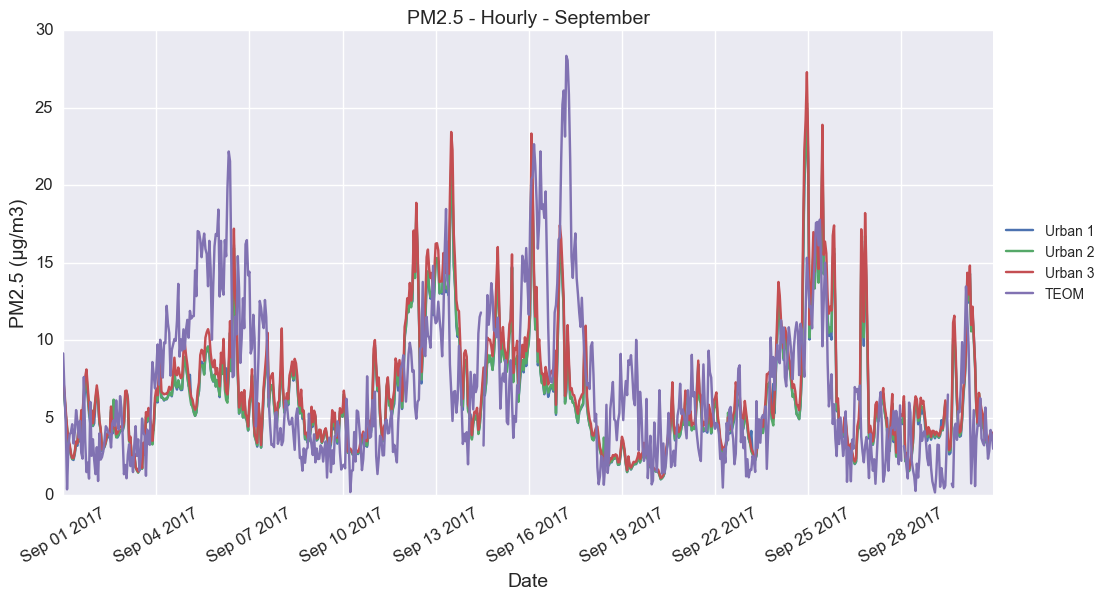

In [388]:
calib=df_hr_sep['PM2.5 (ug/m3)'].mean()/df_hr_sep['pm25-3'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_hr_sep['time'],df_hr_sep['pm25-1']*calib,label='Urban 1')
plt.plot(df_hr_sep['time'],df_hr_sep['pm25-2']*calib,label='Urban 2')
plt.plot(df_hr_sep['time'],df_hr_sep['pm25-3']*calib,label='Urban 3')
plt.plot(df_hr_sep['time'],df_hr_sep['PM2.5 (ug/m3)'],label='TEOM')
plt.title('PM2.5 - Hourly - September',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (µg/m3)',fontsize=14)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

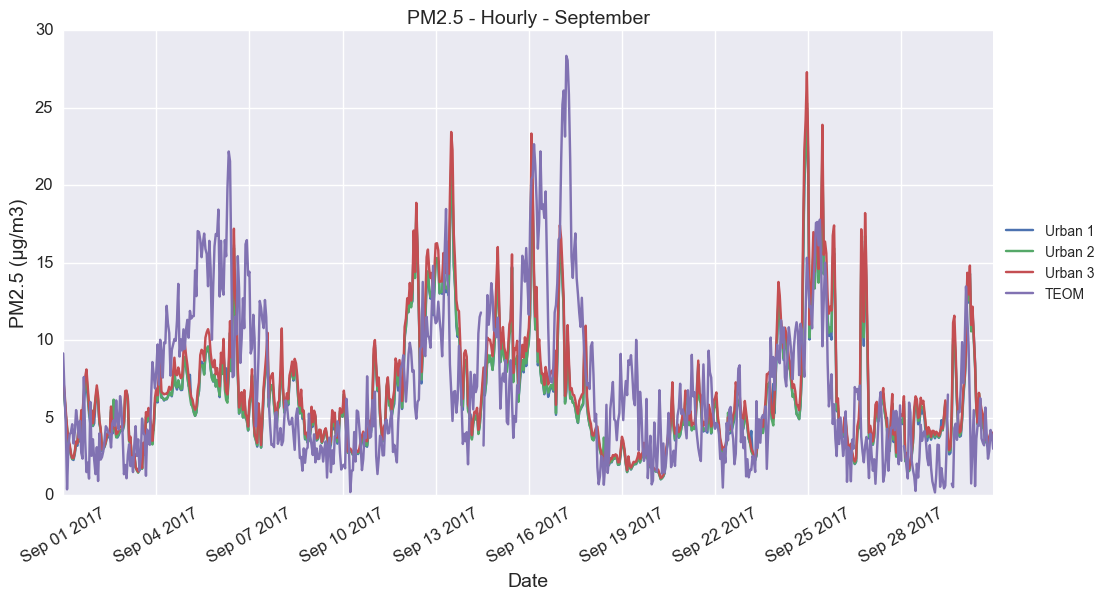

In [361]:
calib=df_hr_sep['PM2.5 (ug/m3)'].mean()/df_hr_sep['pm25-3'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_hr_sep['time'],df_hr_sep['pm25-1']*calib,label='Urban 1')
plt.plot(df_hr_sep['time'],df_hr_sep['pm25-2']*calib,label='Urban 2')
plt.plot(df_hr_sep['time'],df_hr_sep['pm25-3']*calib,label='Urban 3')
plt.plot(df_hr_sep['time'],df_hr_sep['PM2.5 (ug/m3)'],label='TEOM')
plt.title('PM2.5 - Hourly - September',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (µg/m3)',fontsize=14)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

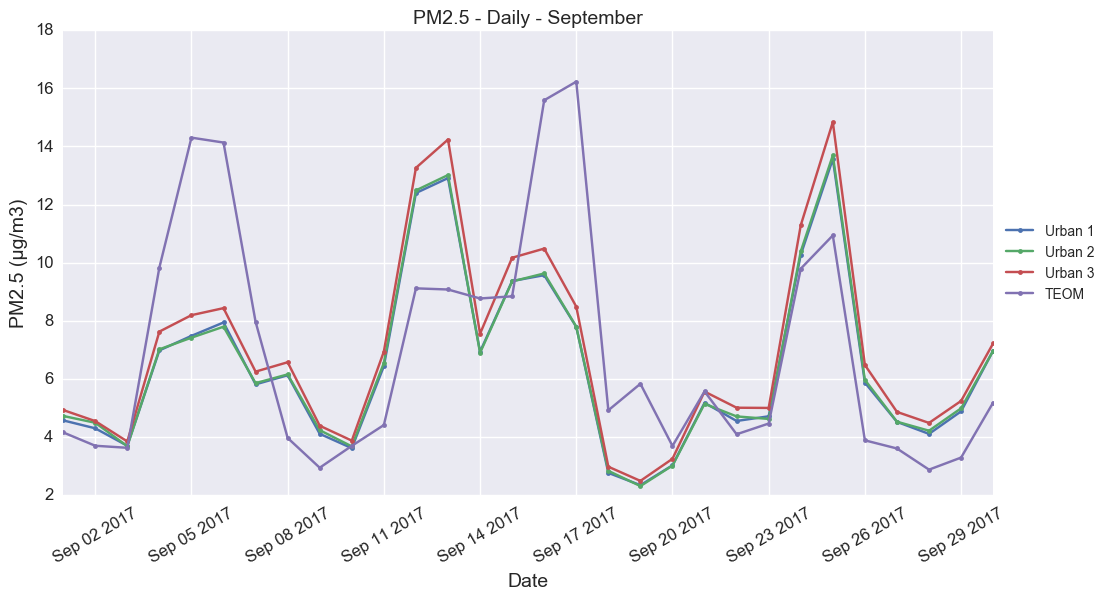

In [389]:
calib=df_daily_sep['PM2.5 (ug/m3)'].mean()/df_daily_sep['pm25-3'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_daily_sep['time'],df_daily_sep['pm25-1']*calib,'.-',label='Urban 1')
plt.plot(df_daily_sep['time'],df_daily_sep['pm25-2']*calib,'.-',label='Urban 2')
plt.plot(df_daily_sep['time'],df_daily_sep['pm25-3']*calib,'.-',label='Urban 3')
plt.plot(df_daily_sep['time'],df_daily_sep['PM2.5 (ug/m3)'],'.-',label='TEOM')
plt.title('PM2.5 - Daily - September',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('PM2.5 (µg/m3)',fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

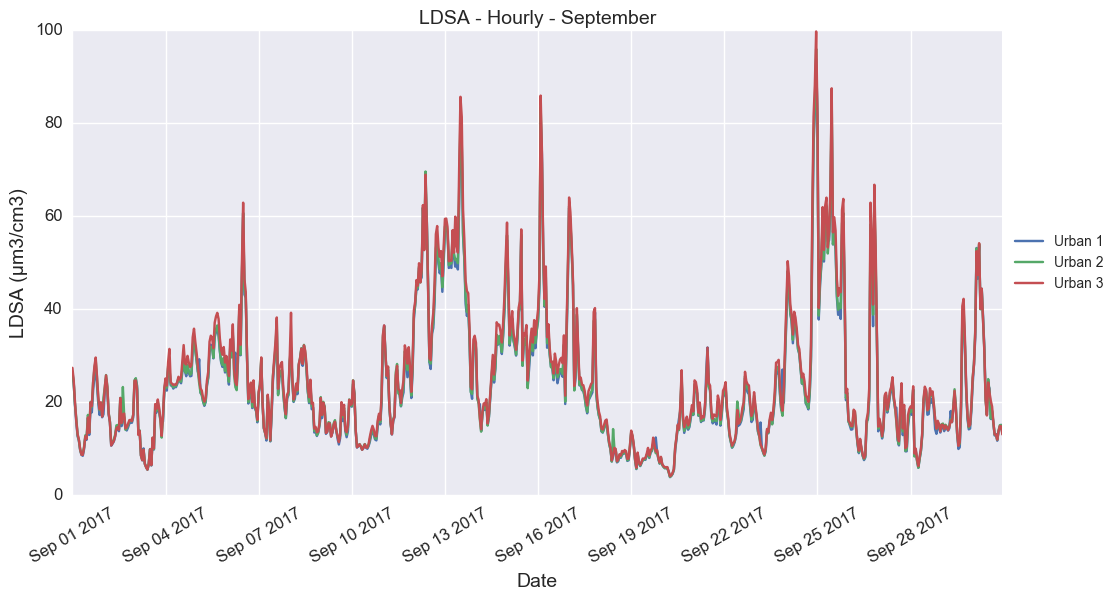

In [390]:
plt.figure(figsize=(12,6))
plt.plot(df_hr_sep['time'],df_hr_sep['ldsa-1'],label='Urban 1')
plt.plot(df_hr_sep['time'],df_hr_sep['ldsa-2'],label='Urban 2')
plt.plot(df_hr_sep['time'],df_hr_sep['ldsa-3'],label='Urban 3')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('LDSA - Hourly - September',fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.ylabel('LDSA (µm3/cm3)',fontsize=14)

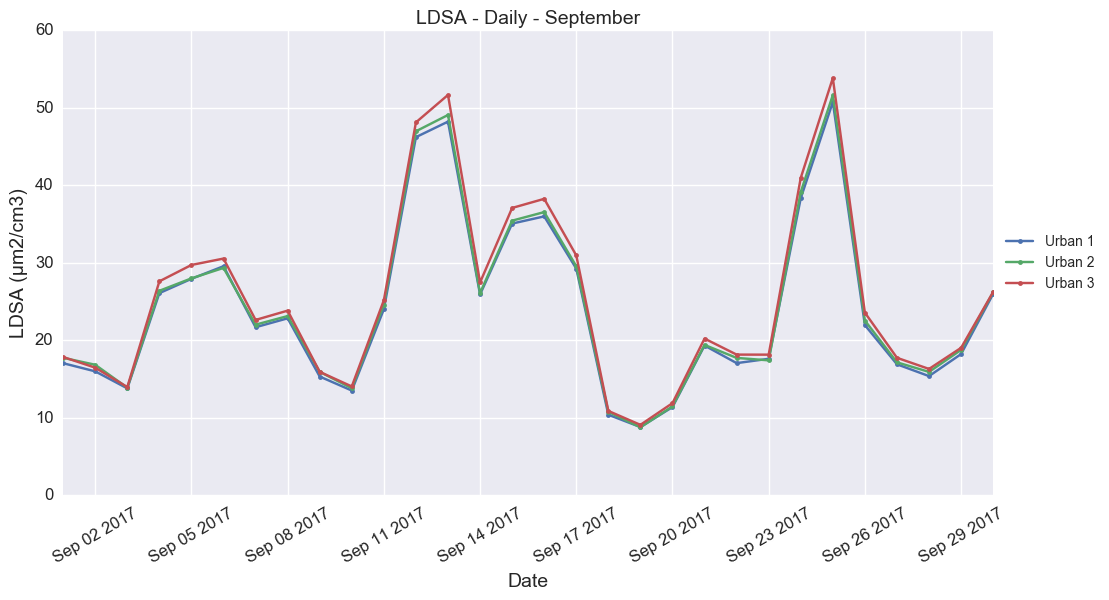

In [391]:
plt.figure(figsize=(12,6))
plt.plot(df_daily_sep['time'],df_daily_sep['ldsa-1'],'.-',label='Urban 1')
plt.plot(df_daily_sep['time'],df_daily_sep['ldsa-2'],'.-',label='Urban 2')
plt.plot(df_daily_sep['time'],df_daily_sep['ldsa-3'],'.-',label='Urban 3')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('LDSA - Daily - September', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('LDSA (µm2/cm3)',fontsize=14)

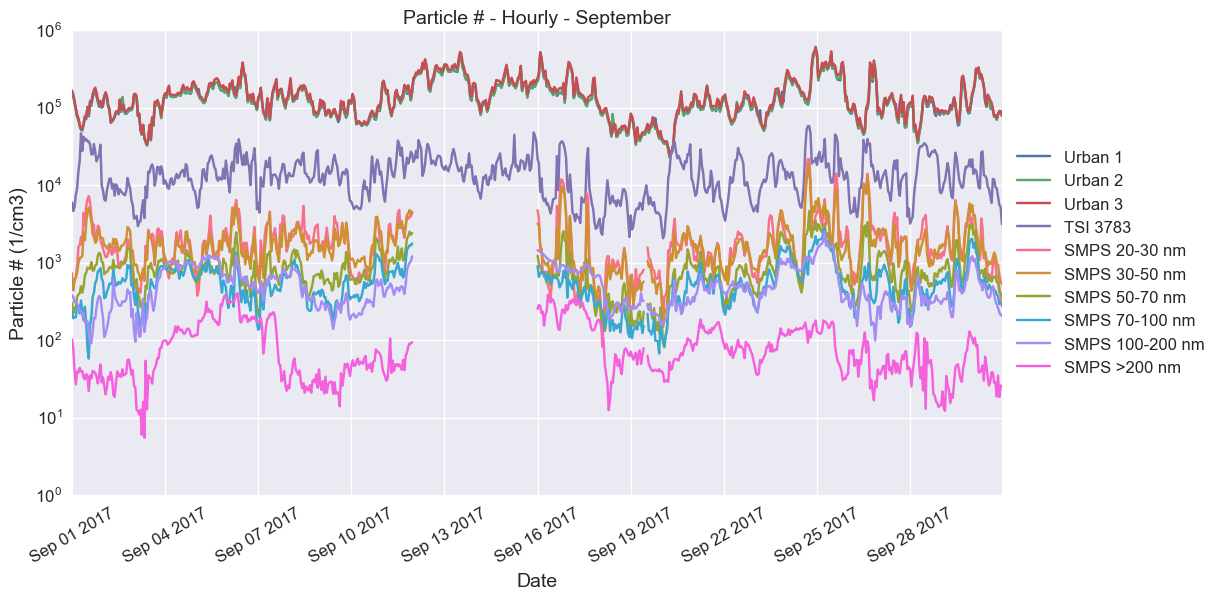

In [392]:
plt.figure(figsize=(12,6))
plt.semilogy(df_hr_sep['time'],df_hr_sep['pn-1'],label='Urban 1')
plt.semilogy(df_hr_sep['time'],df_hr_sep['pn-2'],label='Urban 2')
plt.semilogy(df_hr_sep['time'],df_hr_sep['pn-3'],label='Urban 3')
plt.semilogy(df_hr_sep['time'],df_hr_sep['TNC (#/cm3)'],label='TSI 3783')
plt.semilogy(df_hr_sep['time'],df_hr_sep['ch1'],color=colorz[0],label='SMPS 20-30 nm')
plt.semilogy(df_hr_sep['time'],df_hr_sep['ch2'],color=colorz[1],label='SMPS 30-50 nm')
plt.semilogy(df_hr_sep['time'],df_hr_sep['ch3'],color=colorz[2],label='SMPS 50-70 nm')
plt.semilogy(df_hr_sep['time'],df_hr_sep['ch4'],color=colorz[5],label='SMPS 70-100 nm')
plt.semilogy(df_hr_sep['time'],df_hr_sep['ch5'],color=colorz[6],label='SMPS 100-200 nm')
plt.semilogy(df_hr_sep['time'],df_hr_sep['ch6'],color=colorz[7],label='SMPS >200 nm')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=12)
plt.title('Particle # - Hourly - September', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Particle # (1/cm3)',fontsize=14)

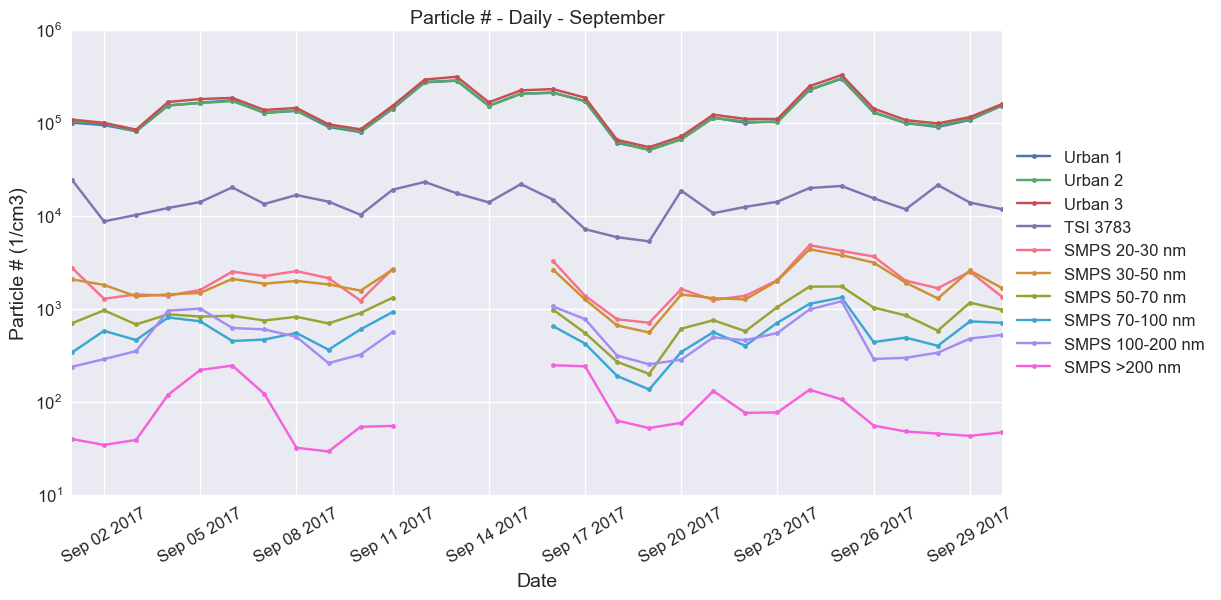

In [393]:
plt.figure(figsize=(12,6))
plt.semilogy(df_daily_sep['time'],df_daily_sep['pn-1'],'.-',label='Urban 1')
plt.semilogy(df_daily_sep['time'],df_daily_sep['pn-2'],'.-',label='Urban 2')
plt.semilogy(df_daily_sep['time'],df_daily_sep['pn-3'],'.-',label='Urban 3')
plt.semilogy(df_daily_sep['time'],df_daily_sep['TNC (#/cm3)'],'.-',label='TSI 3783')
plt.semilogy(df_daily_sep['time'],df_daily_sep['ch1'],'.-',color=colorz[0],label='SMPS 20-30 nm')
plt.semilogy(df_daily_sep['time'],df_daily_sep['ch2'],'.-',color=colorz[1],label='SMPS 30-50 nm')
plt.semilogy(df_daily_sep['time'],df_daily_sep['ch3'],'.-',color=colorz[2],label='SMPS 50-70 nm')
plt.semilogy(df_daily_sep['time'],df_daily_sep['ch4'],'.-',color=colorz[5],label='SMPS 70-100 nm')
plt.semilogy(df_daily_sep['time'],df_daily_sep['ch5'],'.-',color=colorz[6],label='SMPS 100-200 nm')
plt.semilogy(df_daily_sep['time'],df_daily_sep['ch6'],'.-',color=colorz[7],label='SMPS >200 nm')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), fontsize=12)
plt.title('Particle # - Daily - September', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Particle # (1/cm3)',fontsize=14)

In [394]:
df_hr_sep.head()

,time,PM2.5 (ug/m3),PM10 (ug/m3),TNC (#/cm3),ch1,ch2,ch3,ch4,ch5,ch6,...,pm25-1,ldsa-2,pn-2,pm25-2,ldsa-3,pn-3,pm25-3,hr,day,week
1488,2017-09-01 00:00:00,9.144333,12.988500,5999.833333,732.25,657.75,304.25,230.50,383.50,102.50,...,1.066000,26.636000,156802.970833,1.075167,27.373833,167198.226167,1.147333,0,4,1
1489,2017-09-01 01:00:00,6.709500,9.786500,4650.333333,437.50,460.75,222.75,192.00,359.00,78.50,...,0.981000,24.147167,142163.322833,0.974333,24.630333,150437.973500,1.030500,1,4,1
1490,2017-09-01 02:00:00,4.622333,7.442000,5256.666667,599.00,599.50,259.75,196.00,307.25,40.25,...,0.789667,19.480167,115032.339167,0.789500,19.934500,122099.208167,0.837000,2,4,1
1491,2017-09-01 03:00:00,0.375263,2.022500,7453.333333,656.50,635.75,268.25,198.75,309.00,26.75,...,0.643333,16.478667,97481.806333,0.669000,15.903833,97566.937833,0.669333,3,4,1
1492,2017-09-01 04:00:00,3.091667,5.913833,9158.500000,894.25,745.50,366.50,288.75,293.50,39.50,...,0.520167,12.981333,76780.369667,0.526667,13.139000,80574.118333,0.552667,4,4,1


/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

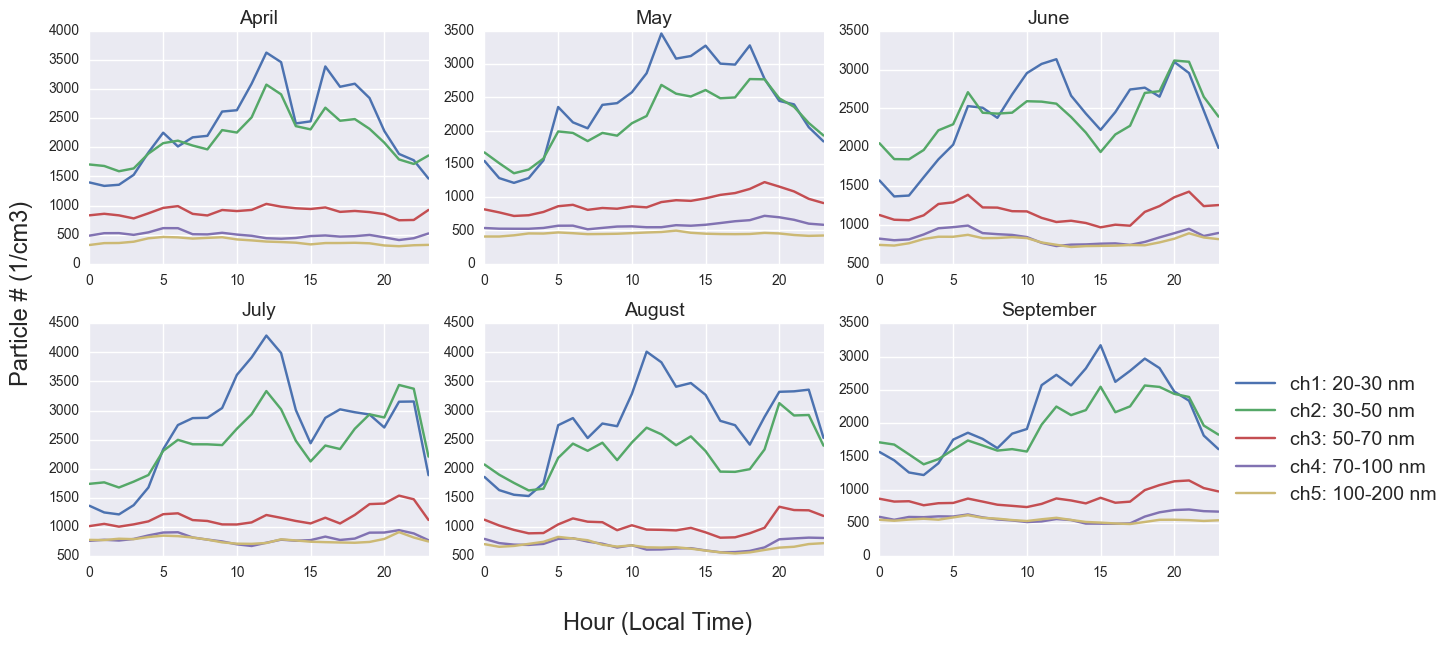

In [325]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

df_hr_apr['hr']=df_hr_apr.time.apply(lambda x: x.hour)
apr=df_hr_apr.groupby('hr').mean().reset_index()
ax.plot(apr['hr'],apr['ch1'])
ax.plot(apr['hr'],apr['ch2'])
ax.plot(apr['hr'],apr['ch3'])
ax.plot(apr['hr'],apr['ch4'])
ax.plot(apr['hr'],apr['ch5'])
ax.set_title('April',fontsize=14)
ax.set_xlim(0,23)


df_hr_may['hr']=df_hr_may.time.apply(lambda x: x.hour)
may=df_hr_may.groupby('hr').mean().reset_index()
ax1.plot(may['hr'],may['ch1'])
ax1.plot(may['hr'],may['ch2'])
ax1.plot(may['hr'],may['ch3'])
ax1.plot(may['hr'],may['ch4'])
ax1.plot(may['hr'],may['ch5'])
ax1.set_title('May',fontsize=14)
ax1.set_xlim(0,23)


df_hr_jun['hr']=df_hr_jun.time.apply(lambda x: x.hour)
jun=df_hr_jun.groupby('hr').mean().reset_index()
ax2.plot(jun['hr'],jun['ch1'])
ax2.plot(jun['hr'],jun['ch2'])
ax2.plot(jun['hr'],jun['ch3'])
ax2.plot(jun['hr'],jun['ch4'])
ax2.plot(jun['hr'],jun['ch5'])
ax2.set_title('June',fontsize=14)
ax2.set_xlim(0,23)

df_hr_jul['hr']=df_hr_jul.time.apply(lambda x: x.hour)
jul=df_hr_jul.groupby('hr').mean().reset_index()
ax3.plot(jul['hr'],jul['ch1'])
ax3.plot(jul['hr'],jul['ch2'])
ax3.plot(jul['hr'],jul['ch3'])
ax3.plot(jul['hr'],jul['ch4'])
ax3.plot(jul['hr'],jul['ch5'])
ax3.set_title('July',fontsize=14)
ax3.set_xlim(0,23)

df_hr_aug['hr']=df_hr_aug.time.apply(lambda x: x.hour)
aug=df_hr_aug.groupby('hr').mean().reset_index()
ax4.plot(aug['hr'],aug['ch1'])
ax4.plot(aug['hr'],aug['ch2'])
ax4.plot(aug['hr'],aug['ch3'])
ax4.plot(aug['hr'],aug['ch4'])
ax4.plot(aug['hr'],aug['ch5'])
ax4.set_title('August',fontsize=14)
ax4.set_xlim(0,23)

df_hr_sep['hr']=df_hr_sep.time.apply(lambda x: x.hour)
sep=df_hr_sep.groupby('hr').mean().reset_index()
ax5.plot(sep['hr'],sep['ch1'],label='ch1: 20-30 nm')
ax5.plot(sep['hr'],sep['ch2'],label='ch2: 30-50 nm')
ax5.plot(sep['hr'],sep['ch3'],label='ch3: 50-70 nm')
ax5.plot(sep['hr'],sep['ch4'],label='ch4: 70-100 nm')
ax5.plot(sep['hr'],sep['ch5'],label='ch5: 100-200 nm')
ax5.set_title('September',fontsize=14)
ax5.set_xlim(0,23)
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'Particle # (1/cm3)', ha='center', va='center', rotation='vertical',fontsize=17)


plt.tight_layout()

In [315]:
df_hr_apr['hr']=df_hr_apr.time.apply(lambda x: x.hour)
df_hr_apr['day']=df_hr_apr.time.apply(lambda x: x.weekday())
df_hr_apr['week']=''
df_hr_apr['week'][df_hr_apr['day']>=5]=0       #weekend
df_hr_apr['week'][df_hr_apr['day']<5]=1        #weekday
apr=df_hr_apr.groupby(['hr','week']).mean().reset_index()
apr_wk=apr[apr['week']==1]
apr_wknd=apr[apr['week']==0]

df_hr_may['hr']=df_hr_may.time.apply(lambda x: x.hour)
df_hr_may['day']=df_hr_may.time.apply(lambda x: x.weekday())
df_hr_may['week']=''
df_hr_may['week'][df_hr_may['day']>=5]=0       #weekend
df_hr_may['week'][df_hr_may['day']<5]=1        #weekday
may=df_hr_may.groupby(['hr','week']).mean().reset_index()
may_wk=may[may['week']==1]
may_wknd=may[may['week']==0]

df_hr_jun['hr']=df_hr_jun.time.apply(lambda x: x.hour)
df_hr_jun['day']=df_hr_jun.time.apply(lambda x: x.weekday())
df_hr_jun['week']=''
df_hr_jun['week'][df_hr_jun['day']>=5]=0       #weekend
df_hr_jun['week'][df_hr_jun['day']<5]=1        #weekday
jun=df_hr_jun.groupby(['hr','week']).mean().reset_index()
jun_wk=jun[jun['week']==1]
jun_wknd=jun[jun['week']==0]

df_hr_jul['hr']=df_hr_jul.time.apply(lambda x: x.hour)
df_hr_jul['day']=df_hr_jul.time.apply(lambda x: x.weekday())
df_hr_jul['week']=''
df_hr_jul['week'][df_hr_jul['day']>=5]=0       #weekend
df_hr_jul['week'][df_hr_jul['day']<5]=1        #weekday
jul=df_hr_jul.groupby(['hr','week']).mean().reset_index()
jul_wk=jul[jul['week']==1]
jul_wknd=jul[jul['week']==0]

df_hr_aug['hr']=df_hr_aug.time.apply(lambda x: x.hour)
df_hr_aug['day']=df_hr_aug.time.apply(lambda x: x.weekday())
df_hr_aug['week']=''
df_hr_aug['week'][df_hr_aug['day']>=5]=0       #weekend
df_hr_aug['week'][df_hr_aug['day']<5]=1        #weekday
aug=df_hr_aug.groupby(['hr','week']).mean().reset_index()
aug_wk=aug[aug['week']==1]
aug_wknd=aug[aug['week']==0]

df_hr_sep['hr']=df_hr_sep.time.apply(lambda x: x.hour)
df_hr_sep['day']=df_hr_sep.time.apply(lambda x: x.weekday())
df_hr_sep['week']=''
df_hr_sep['week'][df_hr_sep['day']>=5]=0       #weekend
df_hr_sep['week'][df_hr_sep['day']<5]=1        #weekday
sep=df_hr_sep.groupby(['hr','week']).mean().reset_index()
sep_wk=sep[sep['week']==1]
sep_wknd=sep[sep['week']==0]

/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

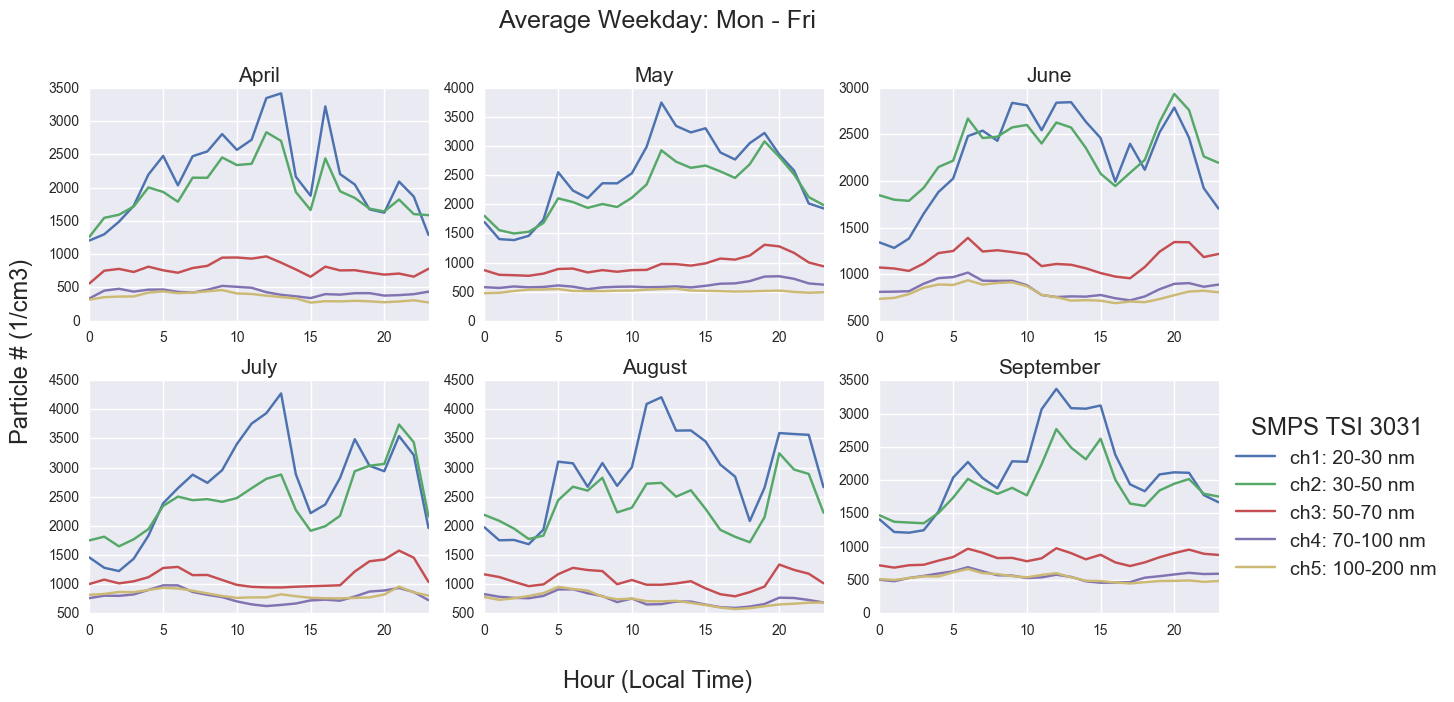

In [358]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wk['hr'],apr_wk['ch1'])
ax.plot(apr_wk['hr'],apr_wk['ch2'])
ax.plot(apr_wk['hr'],apr_wk['ch3'])
ax.plot(apr_wk['hr'],apr_wk['ch4'])
ax.plot(apr_wk['hr'],apr_wk['ch5'])
ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)


ax1.plot(may_wk['hr'],may_wk['ch1'])
ax1.plot(may_wk['hr'],may_wk['ch2'])
ax1.plot(may_wk['hr'],may_wk['ch3'])
ax1.plot(may_wk['hr'],may_wk['ch4'])
ax1.plot(may_wk['hr'],may_wk['ch5'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)


ax2.plot(jun_wk['hr'],jun_wk['ch1'])
ax2.plot(jun_wk['hr'],jun_wk['ch2'])
ax2.plot(jun_wk['hr'],jun_wk['ch3'])
ax2.plot(jun_wk['hr'],jun_wk['ch4'])
ax2.plot(jun_wk['hr'],jun_wk['ch5'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wk['hr'],jul_wk['ch1'])
ax3.plot(jul_wk['hr'],jul_wk['ch2'])
ax3.plot(jul_wk['hr'],jul_wk['ch3'])
ax3.plot(jul_wk['hr'],jul_wk['ch4'])
ax3.plot(jul_wk['hr'],jul_wk['ch5'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wk['hr'],aug_wk['ch1'])
ax4.plot(aug_wk['hr'],aug_wk['ch2'])
ax4.plot(aug_wk['hr'],aug_wk['ch3'])
ax4.plot(aug_wk['hr'],aug_wk['ch4'])
ax4.plot(aug_wk['hr'],aug_wk['ch5'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wk['hr'],sep_wk['ch1'],label='ch1: 20-30 nm')
ax5.plot(sep_wk['hr'],sep_wk['ch2'],label='ch2: 30-50 nm')
ax5.plot(sep_wk['hr'],sep_wk['ch3'],label='ch3: 50-70 nm')
ax5.plot(sep_wk['hr'],sep_wk['ch4'],label='ch4: 70-100 nm')
ax5.plot(sep_wk['hr'],sep_wk['ch5'],label='ch5: 100-200 nm')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('SMPS TSI 3031',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'Particle # (1/cm3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekday: Mon - Fri', ha='center', va='center',fontsize=18)

plt.tight_layout()

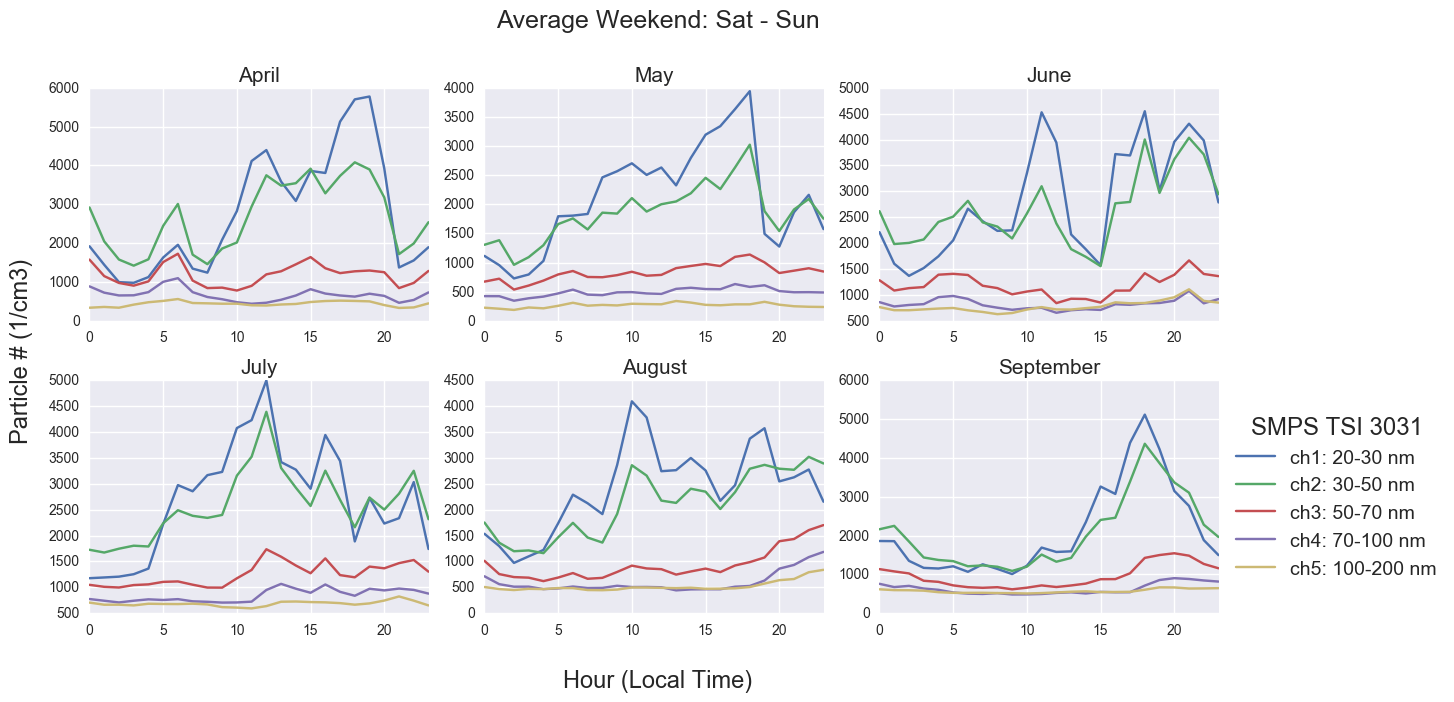

In [357]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wknd['hr'],apr_wknd['ch1'])
ax.plot(apr_wknd['hr'],apr_wknd['ch2'])
ax.plot(apr_wknd['hr'],apr_wknd['ch3'])
ax.plot(apr_wknd['hr'],apr_wknd['ch4'])
ax.plot(apr_wknd['hr'],apr_wknd['ch5'])
ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)


ax1.plot(may_wknd['hr'],may_wknd['ch1'])
ax1.plot(may_wknd['hr'],may_wknd['ch2'])
ax1.plot(may_wknd['hr'],may_wknd['ch3'])
ax1.plot(may_wknd['hr'],may_wknd['ch4'])
ax1.plot(may_wknd['hr'],may_wknd['ch5'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)


ax2.plot(jun_wknd['hr'],jun_wknd['ch1'])
ax2.plot(jun_wknd['hr'],jun_wknd['ch2'])
ax2.plot(jun_wknd['hr'],jun_wknd['ch3'])
ax2.plot(jun_wknd['hr'],jun_wknd['ch4'])
ax2.plot(jun_wknd['hr'],jun_wknd['ch5'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wknd['hr'],jul_wknd['ch1'])
ax3.plot(jul_wknd['hr'],jul_wknd['ch2'])
ax3.plot(jul_wknd['hr'],jul_wknd['ch3'])
ax3.plot(jul_wknd['hr'],jul_wknd['ch4'])
ax3.plot(jul_wknd['hr'],jul_wknd['ch5'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wknd['hr'],aug_wknd['ch1'])
ax4.plot(aug_wknd['hr'],aug_wknd['ch2'])
ax4.plot(aug_wknd['hr'],aug_wknd['ch3'])
ax4.plot(aug_wknd['hr'],aug_wknd['ch4'])
ax4.plot(aug_wknd['hr'],aug_wknd['ch5'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wknd['hr'],sep_wknd['ch1'],label='ch1: 20-30 nm')
ax5.plot(sep_wknd['hr'],sep_wknd['ch2'],label='ch2: 30-50 nm')
ax5.plot(sep_wknd['hr'],sep_wknd['ch3'],label='ch3: 50-70 nm')
ax5.plot(sep_wknd['hr'],sep_wknd['ch4'],label='ch4: 70-100 nm')
ax5.plot(sep_wknd['hr'],sep_wknd['ch5'],label='ch5: 100-200 nm')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('SMPS TSI 3031',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'Particle # (1/cm3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekend: Sat - Sun', ha='center', va='center',fontsize=18)

plt.tight_layout()

In [589]:
test=list([pd.DataFrame.corr(df_daily_apr)['ch5'][4],pd.DataFrame.corr(df_daily_may)['ch5'][4],pd.DataFrame.corr(df_daily_jun)['ch5'][4],pd.DataFrame.corr(df_daily_jul)['ch5'][16],pd.DataFrame.corr(df_daily_aug)['ch5'][16],pd.DataFrame.corr(df_daily_sep)['ch5'][16]])

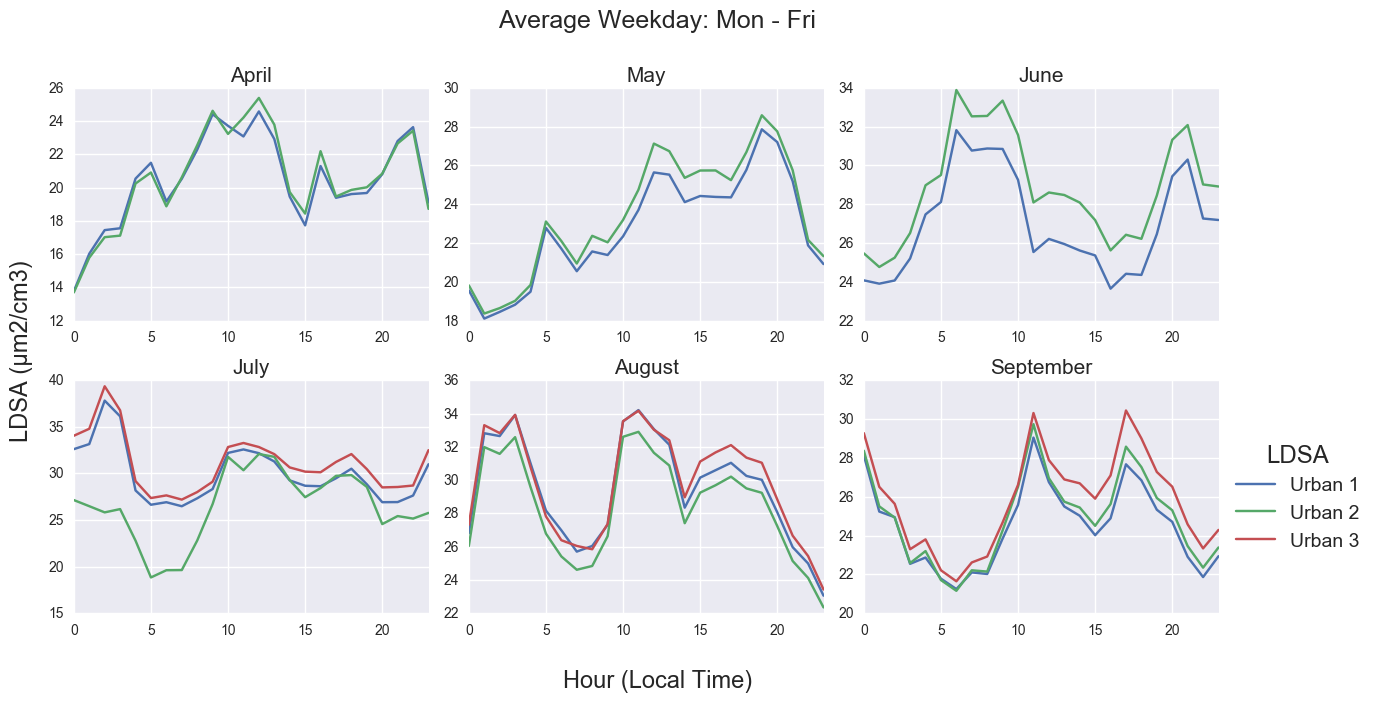

In [610]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wk['hr'],apr_wk['ldsa-1'])
ax.plot(apr_wk['hr'],apr_wk['ldsa-2'])

ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)


ax1.plot(may_wk['hr'],may_wk['ldsa-1'])
ax1.plot(may_wk['hr'],may_wk['ldsa-2'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)


ax2.plot(jun_wk['hr'],jun_wk['ldsa-1'])
ax2.plot(jun_wk['hr'],jun_wk['ldsa-2'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wk['hr'],jul_wk['ldsa-1'])
ax3.plot(jul_wk['hr'],jul_wk['ldsa-2'])
ax3.plot(jul_wk['hr'],jul_wk['ldsa-3'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wk['hr'],aug_wk['ldsa-1'])
ax4.plot(aug_wk['hr'],aug_wk['ldsa-2'])
ax4.plot(aug_wk['hr'],aug_wk['ldsa-3'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wk['hr'],sep_wk['ldsa-1'],label='Urban 1')
ax5.plot(sep_wk['hr'],sep_wk['ldsa-2'],label='Urban 2')
ax5.plot(sep_wk['hr'],sep_wk['ldsa-3'],label='Urban 3')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('LDSA',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'LDSA (µm2/cm3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekday: Mon - Fri', ha='center', va='center',fontsize=18)

plt.tight_layout()

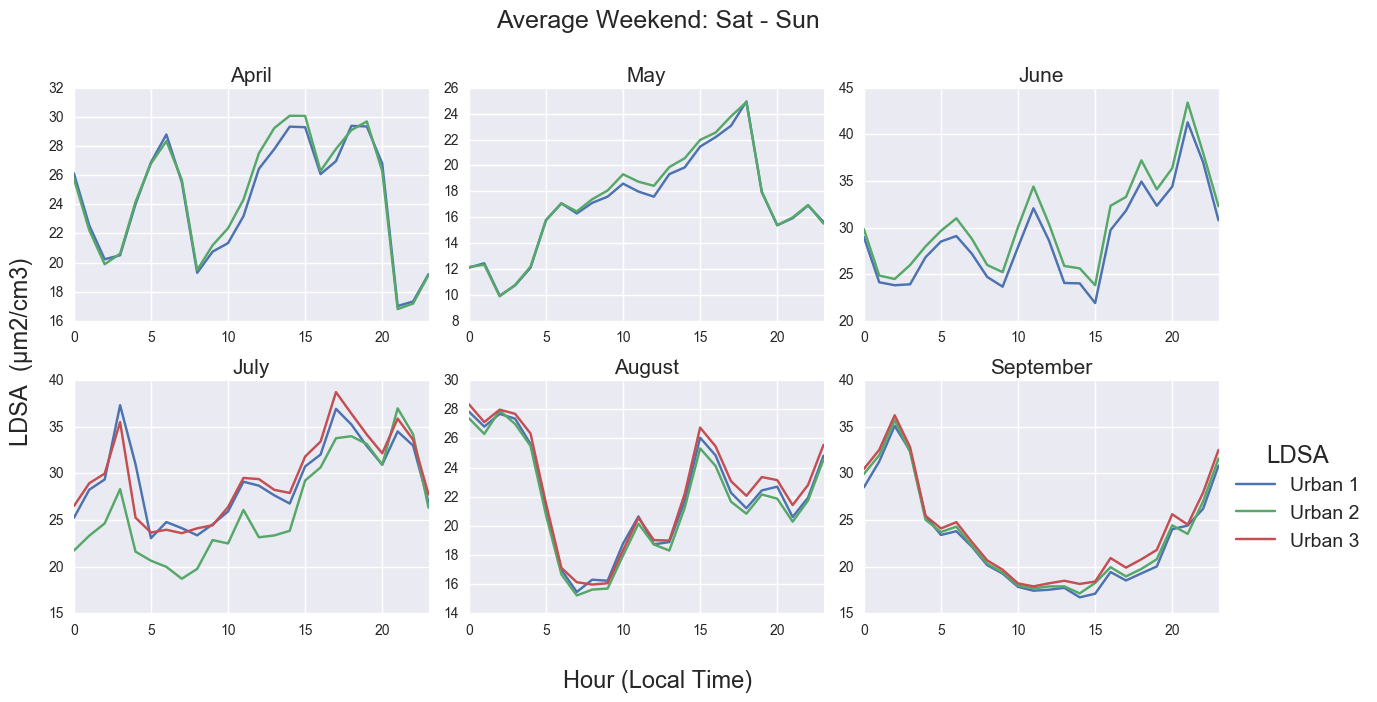

In [609]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wknd['hr'],apr_wknd['ldsa-1'])
ax.plot(apr_wknd['hr'],apr_wknd['ldsa-2'])
ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)

ax1.plot(may_wknd['hr'],may_wknd['ldsa-1'])
ax1.plot(may_wknd['hr'],may_wknd['ldsa-2'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)

ax2.plot(jun_wknd['hr'],jun_wknd['ldsa-1'])
ax2.plot(jun_wknd['hr'],jun_wknd['ldsa-2'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wknd['hr'],jul_wknd['ldsa-1'])
ax3.plot(jul_wknd['hr'],jul_wknd['ldsa-2'])
ax3.plot(jul_wknd['hr'],jul_wknd['ldsa-3'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wknd['hr'],aug_wknd['ldsa-1'])
ax4.plot(aug_wknd['hr'],aug_wknd['ldsa-2'])
ax4.plot(aug_wknd['hr'],aug_wknd['ldsa-3'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wknd['hr'],sep_wknd['ldsa-1'],label='Urban 1')
ax5.plot(sep_wknd['hr'],sep_wknd['ldsa-2'],label='Urban 2')
ax5.plot(sep_wknd['hr'],sep_wknd['ldsa-3'],label='Urban 3')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('LDSA',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'LDSA  (µm2/cm3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekend: Sat - Sun', ha='center', va='center',fontsize=18)

plt.tight_layout()

In [611]:
jul_wknd.columns

Index(['hr', 'week', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'TNC (#/cm3)', 'ch1',
       'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ldsa-1', 'pn-1', 'pm25-1', 'ldsa-2',
       'pn-2', 'pm25-2', 'ldsa-3', 'pn-3', 'pm25-3', 'day'],
      dtype='object')

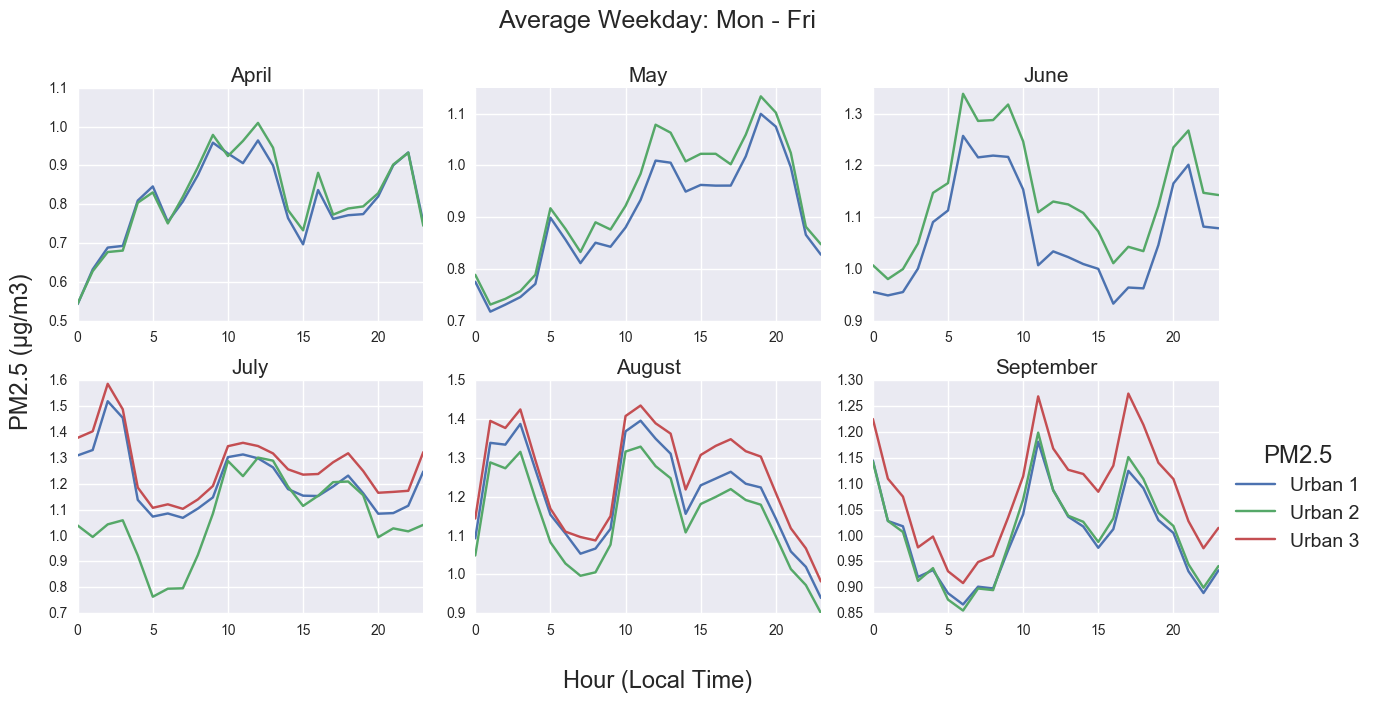

In [614]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wk['hr'],apr_wk['pm25-1'])
ax.plot(apr_wk['hr'],apr_wk['pm25-2'])

ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)


ax1.plot(may_wk['hr'],may_wk['pm25-1'])
ax1.plot(may_wk['hr'],may_wk['pm25-2'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)


ax2.plot(jun_wk['hr'],jun_wk['pm25-1'])
ax2.plot(jun_wk['hr'],jun_wk['pm25-2'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wk['hr'],jul_wk['pm25-1'])
ax3.plot(jul_wk['hr'],jul_wk['pm25-2'])
ax3.plot(jul_wk['hr'],jul_wk['pm25-3'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wk['hr'],aug_wk['pm25-1'])
ax4.plot(aug_wk['hr'],aug_wk['pm25-2'])
ax4.plot(aug_wk['hr'],aug_wk['pm25-3'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wk['hr'],sep_wk['pm25-1'],label='Urban 1')
ax5.plot(sep_wk['hr'],sep_wk['pm25-2'],label='Urban 2')
ax5.plot(sep_wk['hr'],sep_wk['pm25-3'],label='Urban 3')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('PM2.5',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'PM2.5 (µg/m3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekday: Mon - Fri', ha='center', va='center',fontsize=18)

plt.tight_layout()

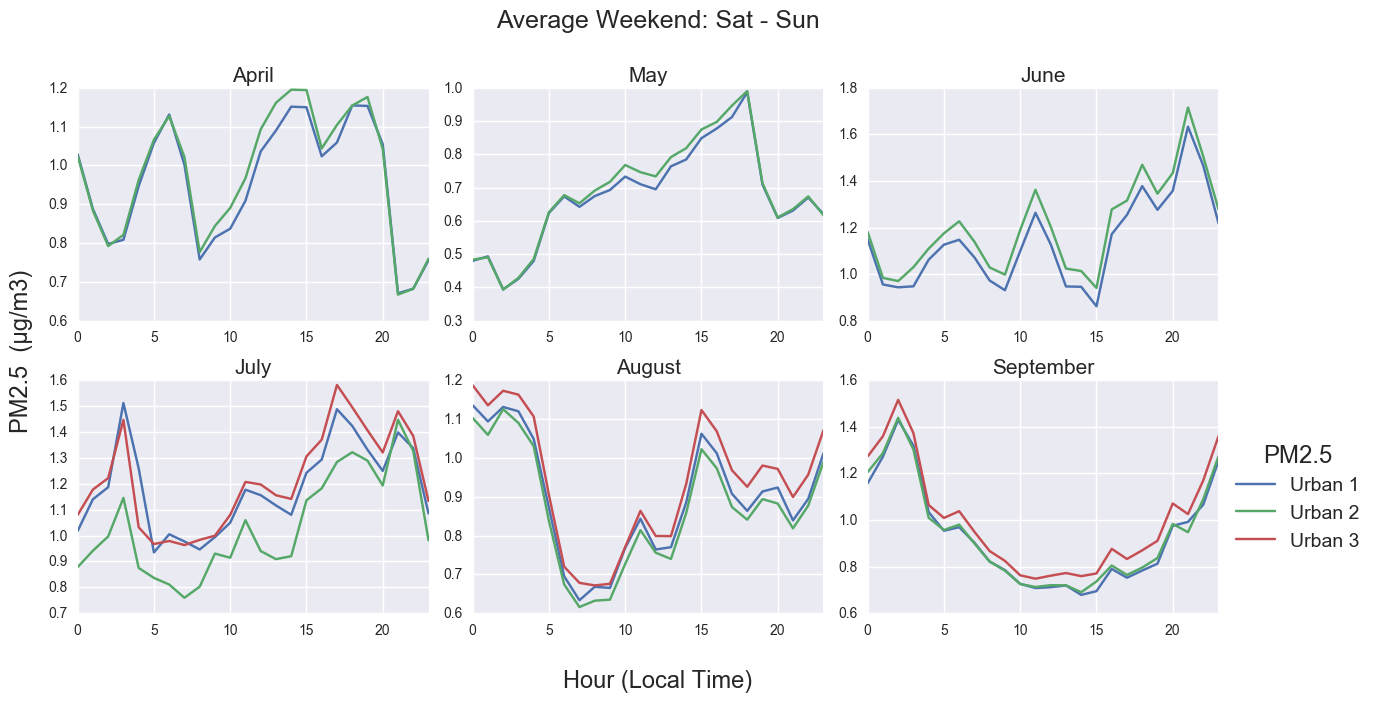

In [619]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wknd['hr'],apr_wknd['pm25-1'])
ax.plot(apr_wknd['hr'],apr_wknd['pm25-2'])
ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)

ax1.plot(may_wknd['hr'],may_wknd['pm25-1'])
ax1.plot(may_wknd['hr'],may_wknd['pm25-2'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)

ax2.plot(jun_wknd['hr'],jun_wknd['pm25-1'])
ax2.plot(jun_wknd['hr'],jun_wknd['pm25-2'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wknd['hr'],jul_wknd['pm25-1'])
ax3.plot(jul_wknd['hr'],jul_wknd['pm25-2'])
ax3.plot(jul_wknd['hr'],jul_wknd['pm25-3'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wknd['hr'],aug_wknd['pm25-1'])
ax4.plot(aug_wknd['hr'],aug_wknd['pm25-2'])
ax4.plot(aug_wknd['hr'],aug_wknd['pm25-3'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wknd['hr'],sep_wknd['pm25-1'],label='Urban 1')
ax5.plot(sep_wknd['hr'],sep_wknd['pm25-2'],label='Urban 2')
ax5.plot(sep_wknd['hr'],sep_wknd['pm25-3'],label='Urban 3')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('PM2.5',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'PM2.5  (µg/m3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekend: Sat - Sun', ha='center', va='center',fontsize=18)

plt.tight_layout()

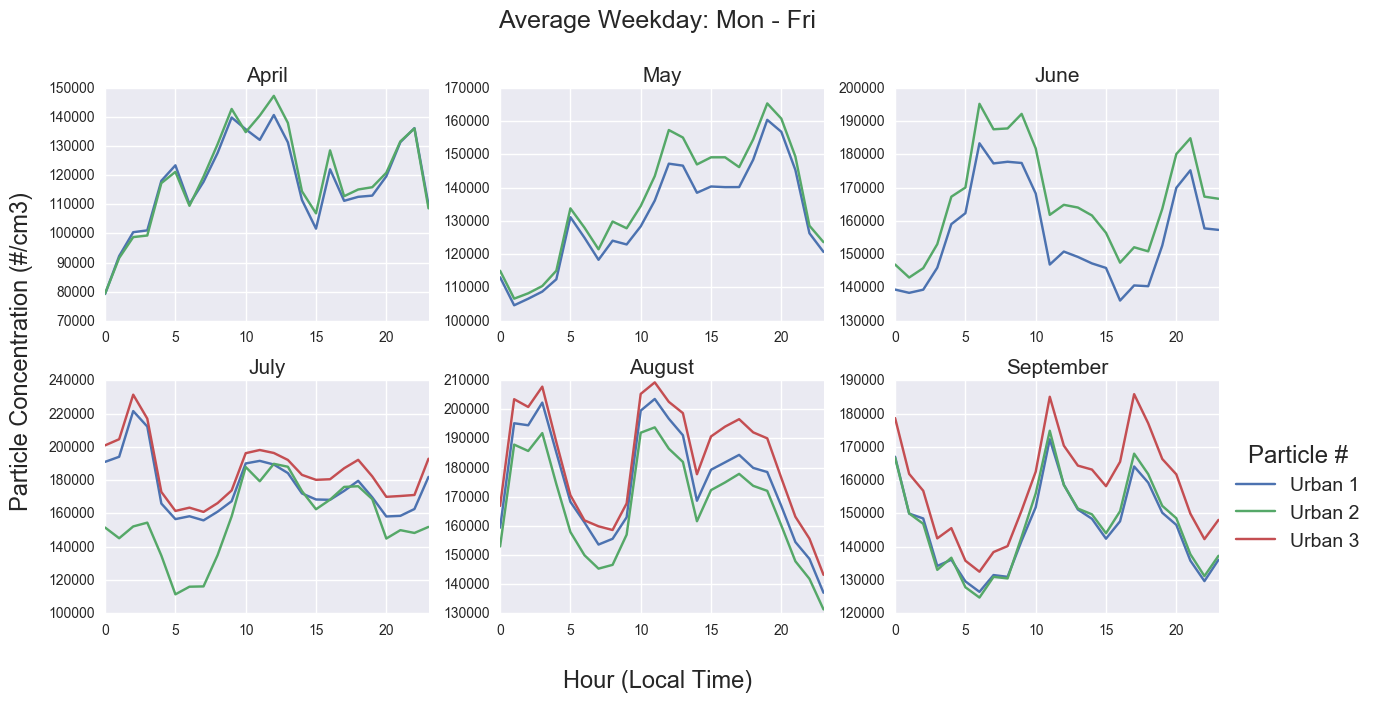

In [618]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wk['hr'],apr_wk['pn-1'])
ax.plot(apr_wk['hr'],apr_wk['pn-2'])

ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)


ax1.plot(may_wk['hr'],may_wk['pn-1'])
ax1.plot(may_wk['hr'],may_wk['pn-2'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)


ax2.plot(jun_wk['hr'],jun_wk['pn-1'])
ax2.plot(jun_wk['hr'],jun_wk['pn-2'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wk['hr'],jul_wk['pn-1'])
ax3.plot(jul_wk['hr'],jul_wk['pn-2'])
ax3.plot(jul_wk['hr'],jul_wk['pn-3'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wk['hr'],aug_wk['pn-1'])
ax4.plot(aug_wk['hr'],aug_wk['pn-2'])
ax4.plot(aug_wk['hr'],aug_wk['pn-3'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wk['hr'],sep_wk['pn-1'],label='Urban 1')
ax5.plot(sep_wk['hr'],sep_wk['pn-2'],label='Urban 2')
ax5.plot(sep_wk['hr'],sep_wk['pn-3'],label='Urban 3')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('Particle #',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'Particle Concentration (#/cm3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekday: Mon - Fri', ha='center', va='center',fontsize=18)

plt.tight_layout()

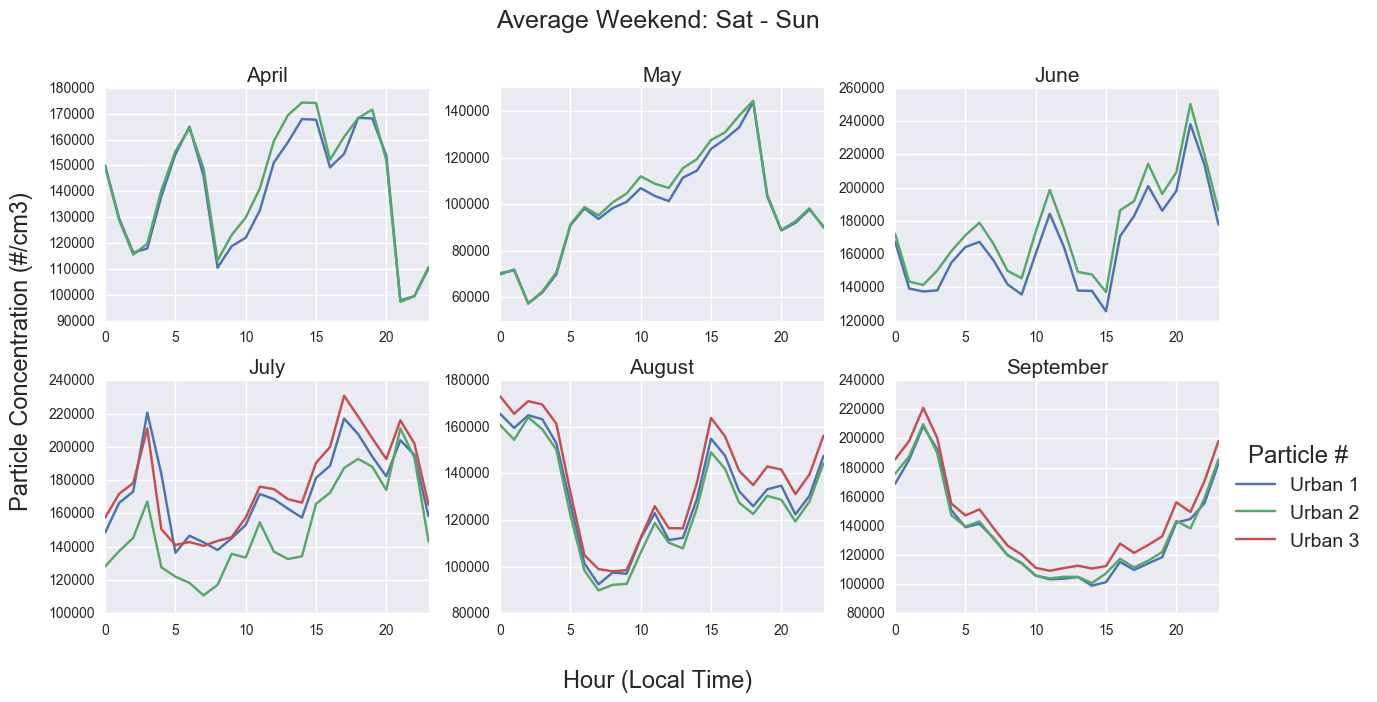

In [617]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)

ax.plot(apr_wknd['hr'],apr_wknd['pn-1'])
ax.plot(apr_wknd['hr'],apr_wknd['pn-2'])
ax.set_title('April',fontsize=15)
ax.set_xlim(0,23)

ax1.plot(may_wknd['hr'],may_wknd['pn-1'])
ax1.plot(may_wknd['hr'],may_wknd['pn-2'])
ax1.set_title('May',fontsize=15)
ax1.set_xlim(0,23)

ax2.plot(jun_wknd['hr'],jun_wknd['pn-1'])
ax2.plot(jun_wknd['hr'],jun_wknd['pn-2'])
ax2.set_title('June',fontsize=15)
ax2.set_xlim(0,23)

ax3.plot(jul_wknd['hr'],jul_wknd['pn-1'])
ax3.plot(jul_wknd['hr'],jul_wknd['pn-2'])
ax3.plot(jul_wknd['hr'],jul_wknd['pn-3'])
ax3.set_title('July',fontsize=15)
ax3.set_xlim(0,23)

ax4.plot(aug_wknd['hr'],aug_wknd['pn-1'])
ax4.plot(aug_wknd['hr'],aug_wknd['pn-2'])
ax4.plot(aug_wknd['hr'],aug_wknd['pn-3'])
ax4.set_title('August',fontsize=15)
ax4.set_xlim(0,23)

ax5.plot(sep_wknd['hr'],sep_wknd['pn-1'],label='Urban 1')
ax5.plot(sep_wknd['hr'],sep_wknd['pn-2'],label='Urban 2')
ax5.plot(sep_wknd['hr'],sep_wknd['pn-3'],label='Urban 3')
ax5.set_title('September',fontsize=15)
ax5.set_xlim(0,23)
leg=ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
leg.set_title('Particle #',prop={'size':'xx-large'})


fig.text(0.52, -0.05, 'Hour (Local Time)', ha='center', va='center',fontsize=17)
fig.text(-0.01, 0.5, 'Particle Concentration (#/cm3)', ha='center', va='center', rotation='vertical',fontsize=17)
fig.text(0.52, 1.05, 'Average Weekend: Sat - Sun', ha='center', va='center',fontsize=18)

plt.tight_layout()